### Load Data

In [2]:
import pandas as pd 

df = pd.read_csv("weatherHistory.csv")

In [2]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### First correlation analysis to see which numerical columns can be dropped because they dont predict the temperature


C:\Users\marcb\AppData\Local\Temp\ipykernel_31536\2187953593.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation with Temperature (C):
Temperature (C)             1.000000
Apparent Temperature (C)    0.992629
Visibility (km)             0.392847
Wind Bearing (degrees)      0.029988
Wind Speed (km/h)           0.008957
Pressure (millibars)       -0.005447
Humidity                   -0.632255
Loud Cover                       NaN
Name: Temperature (C), dtype: float64


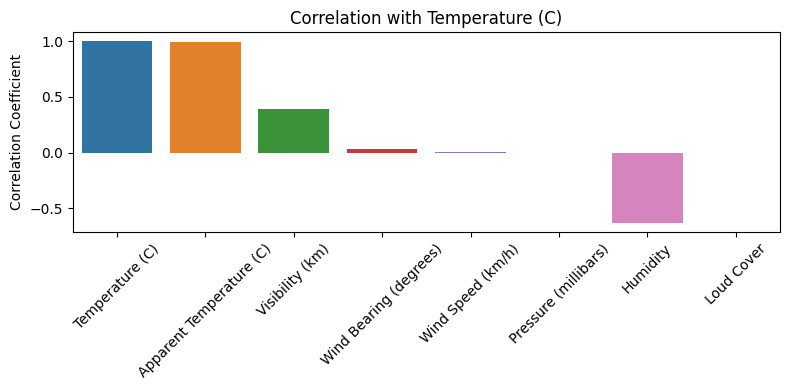

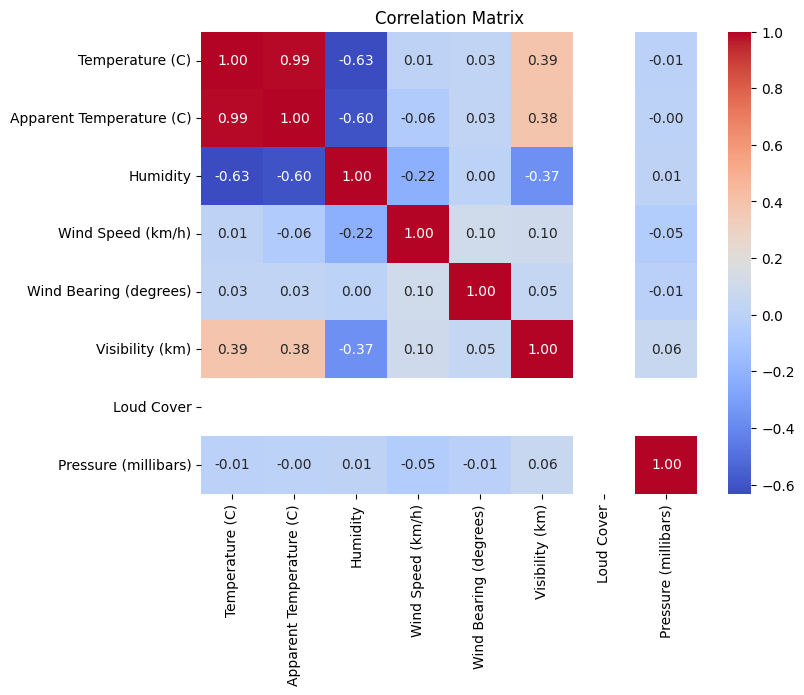

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with Temperature (C)
temperature_corr = correlation_matrix["Temperature (C)"].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Temperature (C):")
print(temperature_corr)

# Visualize the correlation as a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=temperature_corr.index, y=temperature_corr.values)
plt.title("Correlation with Temperature (C)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally: Visualize the entire correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Drop all columns that have low correlation: All of the Dates and Strings + Apparant Temperature, Wind Bearing , Wind Speed

In [4]:
df = df.drop("Formatted Date", axis=1)
df = df.drop("Summary", axis=1)
df = df.drop("Precip Type", axis=1)
df = df.drop("Apparent Temperature (C)", axis=1)
df = df.drop("Loud Cover", axis=1)
df = df.drop("Daily Summary", axis=1)
df = df.drop("Wind Speed (km/h)", axis=1)
df = df.drop("Wind Bearing (degrees)", axis=1)
df = df.drop("Pressure (millibars)", axis=1)


In [5]:
df

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


### Visualizing remaining columns and their correlation

Correlation with Temperature (C):
Temperature (C)    1.000000
Visibility (km)    0.392847
Humidity          -0.632255
Name: Temperature (C), dtype: float64


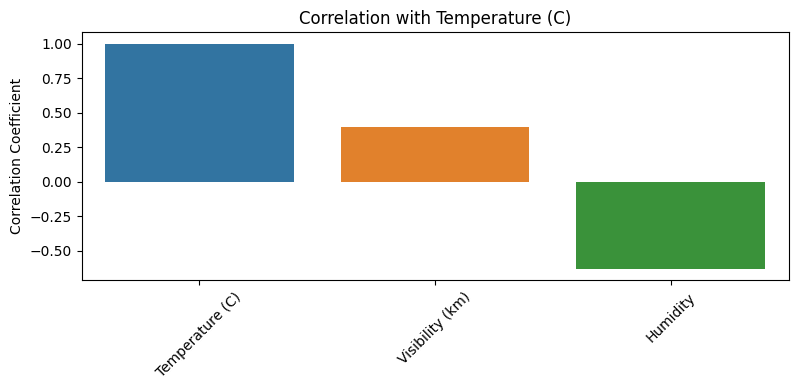

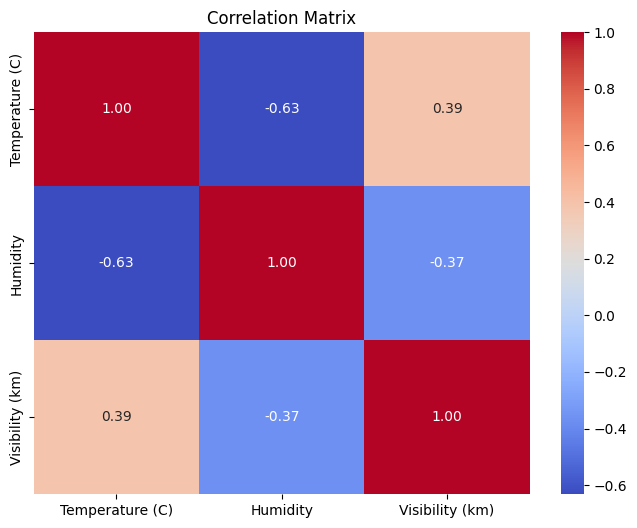

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with Temperature (C)
temperature_corr = correlation_matrix["Temperature (C)"].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Temperature (C):")
print(temperature_corr)

# Visualize the correlation as a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=temperature_corr.index, y=temperature_corr.values)
plt.title("Correlation with Temperature (C)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally: Visualize the entire correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Showing data has no missing values

In [7]:
df

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


In [8]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Temperature (C)    0
Humidity           0
Visibility (km)    0
dtype: int64


In [9]:
# Print the data type of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Temperature (C)    float64
Humidity           float64
Visibility (km)    float64
dtype: object


### Checking for outliers

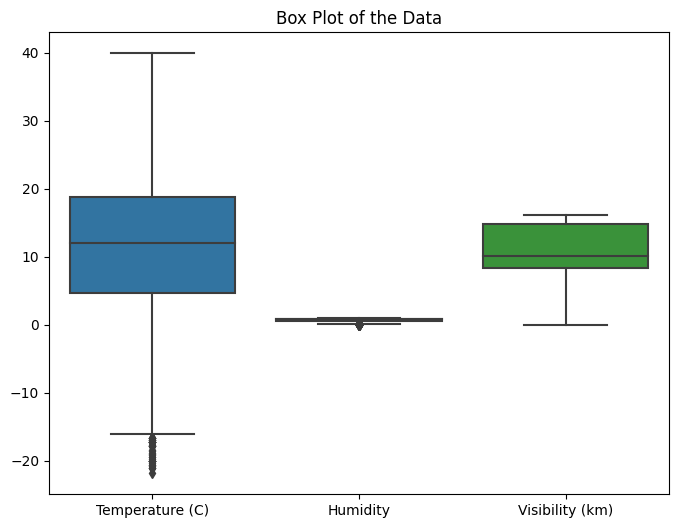

Outliers based on IQR method:

Temperature (C):
       Temperature (C)  Humidity  Visibility (km)
28104       -16.666667      0.87           6.1180
28106       -16.666667      0.87           8.0500
54843       -16.666667      0.83           4.0250
54844       -17.655556      0.90           3.5742
54845       -20.000000      0.82           1.4490
54846       -20.000000      0.78           0.6440
54847       -21.822222      0.80           1.3685
54848       -20.000000      0.78           1.4490
54849       -17.222222      0.87           1.4490
54859       -16.911111      0.87           2.7370
54860       -17.222222      0.87           2.5760
54861       -17.222222      0.83           1.4490
54862       -19.027778      0.80           0.6601
54863       -19.444444      0.78           0.6440
54864       -20.000000      0.78           0.0000
54865       -19.166667      0.81           1.0626
54866       -20.555556      0.78           1.4490
54867       -16.666667      0.83           2.5760
55

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify Outliers using IQR (Interquartile Range)
def find_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply IQR method to find outliers
outliers_iqr = find_outliers_iqr(df)

# 2. Visualize outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Box Plot of the Data')
plt.show()

# 3. Display outliers based on IQR method
print("Outliers based on IQR method:")
for col, outlier_data in outliers_iqr.items():
    print(f"\n{col}:")
    print(outlier_data)


In [11]:
# 1. Identify Outliers using IQR (Interquartile Range)
def find_outliers_iqr(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

# Get outliers count from IQR method
outliers_iqr = find_outliers_iqr(df)

# Print the number of outliers for each column based on IQR method
print("Number of outliers based on IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")



Number of outliers based on IQR method:
Temperature (C): 44 outliers
Humidity: 46 outliers
Visibility (km): 0 outliers


### The number of outliers is small to improve prediction accuracy there will be excluded or Croped as written in the Flowchart

In [12]:
# Remove the rows with outliers based on IQR condition
def remove_outliers_iqr(df, outliers):
    for column, is_outlier in outliers.items():
        # Keep only the rows where the value is not an outlier
        df = df[~is_outlier]
    return df

# Exclude the outliers from the DataFrame
df_no_outliers = remove_outliers_iqr(df, outliers_iqr)

# Display the new DataFrame without outliers
print("DataFrame after excluding outliers:")
print(df_no_outliers)


KeyError: -45

### We will now work with the df_no_outliers cleaned list. Unneccary data was removed, dat cleaned and outliers cropped. We are now ready for the training phase

In [ ]:
df_no_outliers

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263
...,...,...,...
96448,26.016667,0.43,16.1000
96449,24.583333,0.48,15.5526
96450,22.038889,0.56,16.1000
96451,21.522222,0.60,16.1000


### Splitting Data


In [ ]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop('Temperature (C)', axis=1)  # Features (all columns except 'Temperature (C)')
y = df_no_outliers['Temperature (C)']  # Target variable (Temperature)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 77093 samples
Testing set size: 19274 samples


Baseline Model (Linear Regression):
MSE: 52.95991602854635
R-squared: 0.4253436137730612

Linear Regression CV Mean Squared Error: 52.4708889392305
Lasso Regression (Hyperparameter Optimization):
Best Alpha: 0.01
MSE: 52.95914947093843
R-squared: 0.4253519315208568

Polynomial Regression (Degree 2):
MSE: 50.62412181426665
R-squared: 0.45068880241392406

Random Forest Regression (Hyperparameter Optimization):
Best Params: {'max_depth': 10, 'n_estimators': 200}
MSE: 43.85065641199218
R-squared: 0.5241861838713675



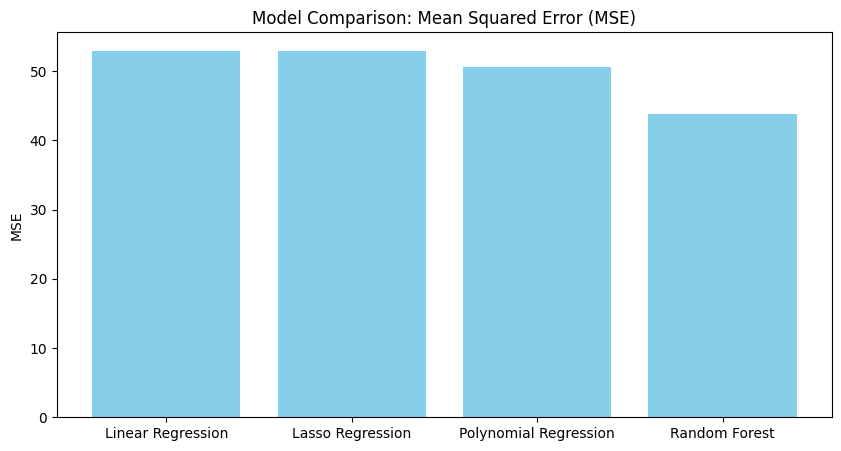

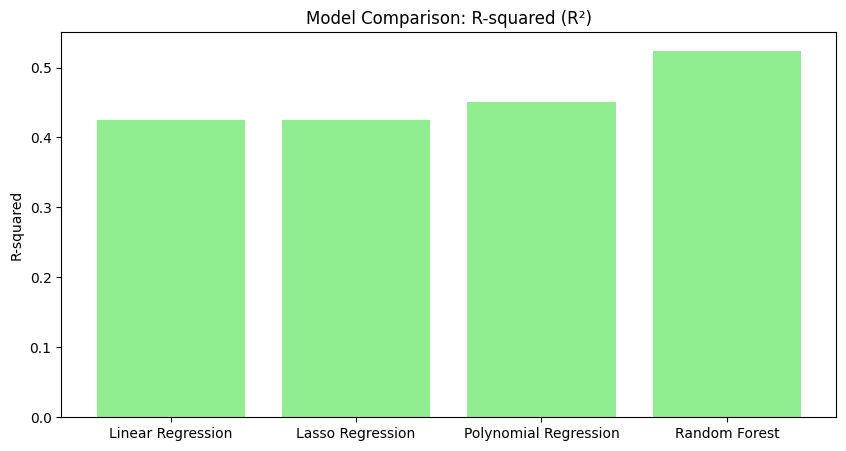

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = df[['Humidity', 'Visibility (km)']]  # Features
y = df['Temperature (C)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Baseline Model: Linear Regression ---
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline Model (Linear Regression):")
print(f"MSE: {mse_baseline}")
print(f"R-squared: {r2_baseline}\n")

# --- 2. Cross-Validation ---
# Linear Regression Cross-Validation
linear_reg = LinearRegression()
cv_linear = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV
cv_mse_linear = -np.mean(cv_linear)  # Negating to get positive MSE
print(f"Linear Regression CV Mean Squared Error: {cv_mse_linear}")

# --- 3. Hyperparameter Optimization ---

# --- Lasso Regression ---
lasso_reg = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_search = GridSearchCV(lasso_reg, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)
best_lasso_model = lasso_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression (Hyperparameter Optimization):")
print(f"Best Alpha: {lasso_search.best_params_['alpha']}")
print(f"MSE: {mse_lasso}")
print(f"R-squared: {r2_lasso}\n")

# --- Polynomial Regression ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (Degree 2):")
print(f"MSE: {mse_poly}")
print(f"R-squared: {r2_poly}\n")

# --- Random Forest Regression ---
rf_reg = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_search = GridSearchCV(rf_reg, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_search.fit(X_train, y_train)
best_rf_model = rf_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression (Hyperparameter Optimization):")
print(f"Best Params: {rf_search.best_params_}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}\n")

# --- Visual Comparison of Models ---
models = ['Linear Regression', 'Lasso Regression', 'Polynomial Regression', 'Random Forest']
mse_values = [mse_baseline, mse_lasso, mse_poly, mse_rf]
r2_values = [r2_baseline, r2_lasso, r2_poly, r2_rf]

# Plot MSE values for comparison
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue')
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

# Plot R-squared values for comparison
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='lightgreen')
plt.title('Model Comparison: R-squared (R²)')
plt.ylabel('R-squared')
plt.show()


Linear Regression:
Accuracy: 42.53%
R²: 0.4253, MSE: 52.9599

Lasso Regression:
Accuracy: 42.54%
R²: 0.4254, MSE: 52.9591

Polynomial Regression:
Accuracy: 51.48%
MAE: 5.7673, R²: 0.4507

Random Forest:
Accuracy: 55.74%
MAE: 5.2604, R²: 0.5242



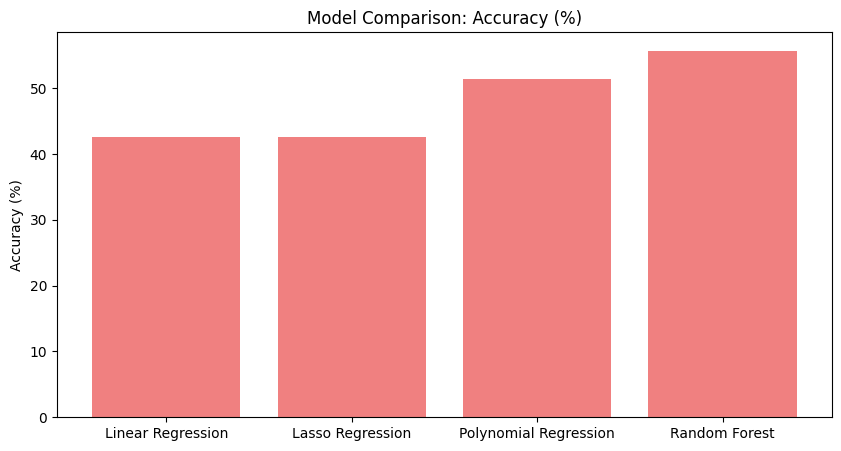

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# --- Datenvorbereitung ---
X = df[['Humidity', 'Visibility (km)']]  # Features
y = df['Temperature (C)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Hilfsfunktion für Accuracy in Prozent ---
def calculate_accuracy(metric_value, metric_type='R2', y_test=None, y_pred=None):
    if metric_type == 'R2':
        accuracy = max(0, min(1, metric_value)) * 100  # R² in Prozent (max auf 0 setzen, falls negativ)
    elif metric_type == 'MAE':
        accuracy = (1 - (metric_value / np.mean(y_test))) * 100  # MAE-Accuracy
    else:
        raise ValueError("Unsupported metric type")
    return accuracy

# --- 1. Lineare Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

accuracy_linear = calculate_accuracy(r2_linear, metric_type='R2')

# --- 2. Lasso Regression mit Hyperparameter-Optimierung ---
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='r2')
lasso_search.fit(X_train, y_train)
best_lasso_model = lasso_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

accuracy_lasso = calculate_accuracy(r2_lasso, metric_type='R2')

# --- 3. Polynomial Regression ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

accuracy_poly = calculate_accuracy(mae_poly, metric_type='MAE', y_test=y_test)

# --- 4. Random Forest Regression mit Hyperparameter-Optimierung ---
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_absolute_error')
rf_search.fit(X_train, y_train)
best_rf_model = rf_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

accuracy_rf = calculate_accuracy(mae_rf, metric_type='MAE', y_test=y_test)

# --- Ergebnisse ---
models = ['Linear Regression', 'Lasso Regression', 'Polynomial Regression', 'Random Forest']
accuracies = [accuracy_linear, accuracy_lasso, accuracy_poly, accuracy_rf]
metrics = [
    (r2_linear, mse_linear),
    (r2_lasso, mse_lasso),
    (r2_poly, mae_poly),
    (r2_rf, mae_rf)
]

for i, model in enumerate(models):
    print(f"{model}:")
    print(f"Accuracy: {accuracies[i]:.2f}%")
    if i < 2:  # Lineare Modelle
        print(f"R²: {metrics[i][0]:.4f}, MSE: {metrics[i][1]:.4f}\n")
    else:  # Nichtlineare Modelle
        print(f"MAE: {metrics[i][1]:.4f}, R²: {metrics[i][0]:.4f}\n")

# --- Visualisierung ---
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='lightcoral')
plt.title('Model Comparison: Accuracy (%)')
plt.ylabel('Accuracy (%)')
plt.show()


### After multiple tries Random Forest seems to be the most accurate indicating that the relationship between Temperature and Humidity/Visibility is not as linear as I though. It seems to be a more non-linear relationship



### Lets try reimplementing the other features which "had little to no impact" in the first analysis

Adding more features also adds apparant temperature which is almost the same, adding more features is not the way to go as expected

### The following list contains all possible changes that may make sense and will be tried:
1. Hyperparameter Tuning with GridSearch
2. Increse number of trees and max depth aswell as gradient boosting
3. 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 51441, number of used features: 2
[LightGBM] [Info] Start training from score 11.982045
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 51441, number of used features: 2
[LightGBM] [Info] Start training from score 11.925087
[LightGBM] [Warning] Found whi

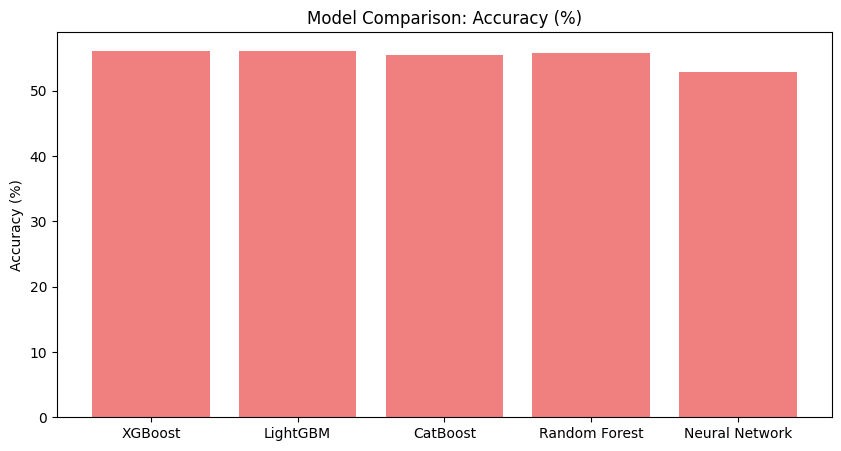

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Importing models
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# --- Datenvorbereitung ---
X = df[['Humidity', 'Visibility (km)']]  # Features
y = df['Temperature (C)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Hilfsfunktion für Accuracy in Prozent ---
def calculate_accuracy(metric_value, metric_type='R2', y_test=None, y_pred=None):
    if metric_type == 'R2':
        accuracy = max(0, min(1, metric_value)) * 100  # R² in Prozent (max auf 0 setzen, falls negativ)
    elif metric_type == 'MAE':
        accuracy = (1 - (metric_value / np.mean(y_test))) * 100  # MAE-Accuracy
    else:
        raise ValueError("Unsupported metric type")
    return accuracy

# --- 1. XGBoost Regression ---
xgb_model = XGBRegressor()
xgb_param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.2]}
xgb_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')  # Reduced cv
xgb_search.fit(X_train, y_train)
best_xgb_model = xgb_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

accuracy_xgb = calculate_accuracy(mae_xgb, metric_type='MAE', y_test=y_test)

# --- 2. LightGBM Regression ---
lgb_model = lgb.LGBMRegressor()
lgb_param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.2]}
lgb_search = GridSearchCV(lgb_model, lgb_param_grid, cv=3, scoring='neg_mean_absolute_error')  # Reduced cv
lgb_search.fit(X_train, y_train)
best_lgb_model = lgb_search.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

accuracy_lgb = calculate_accuracy(mae_lgb, metric_type='MAE', y_test=y_test)

# --- 3. CatBoost Regression ---
cat_model = CatBoostRegressor(silent=True)
cat_param_grid = {'iterations': [50, 100], 'learning_rate': [0.1, 0.2]}
cat_search = GridSearchCV(cat_model, cat_param_grid, cv=3, scoring='neg_mean_absolute_error')  # Reduced cv
cat_search.fit(X_train, y_train)
best_cat_model = cat_search.best_estimator_
y_pred_cat = best_cat_model.predict(X_test)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

accuracy_cat = calculate_accuracy(mae_cat, metric_type='MAE', y_test=y_test)

# --- 4. Random Forest Regression ---
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [10, 20]}  # Reduced parameter space
rf_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')  # Reduced cv
rf_search.fit(X_train, y_train)
best_rf_model = rf_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

accuracy_rf = calculate_accuracy(mae_rf, metric_type='MAE', y_test=y_test)

# --- 5. Neural Network (MLP) Regression ---
mlp_model = MLPRegressor(max_iter=500)  # Reduced iterations
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,)], 'learning_rate_init': [0.001, 0.01]}  # Reduced grid
mlp_search = GridSearchCV(mlp_model, mlp_param_grid, cv=3, scoring='neg_mean_absolute_error')  # Reduced cv
mlp_search.fit(X_train, y_train)
best_mlp_model = mlp_search.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

accuracy_mlp = calculate_accuracy(mae_mlp, metric_type='MAE', y_test=y_test)

# --- Ergebnisse ---
models = ['XGBoost', 'LightGBM', 'CatBoost', 'Random Forest', 'Neural Network']
accuracies = [accuracy_xgb, accuracy_lgb, accuracy_cat, accuracy_rf, accuracy_mlp]
metrics = [
    (r2_xgb, mae_xgb),
    (r2_lgb, mae_lgb),
    (r2_cat, mae_cat),
    (r2_rf, mae_rf),
    (r2_mlp, mae_mlp)
]

for i, model in enumerate(models):
    print(f"{model}:")
    print(f"Accuracy: {accuracies[i]:.2f}%")
    print(f"R²: {metrics[i][0]:.4f}, MAE: {metrics[i][1]:.4f}\n")

# --- Visualisierung ---
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='lightcoral')
plt.title('Model Comparison: Accuracy (%)')
plt.ylabel('Accuracy (%)')
plt.show()


### Because there is no real difference I am going to stick with Random Forest and try to optimize that
